In [1]:
import numpy as np
from scipy.stats import norm, expon, chisquare
import sys
import matplotlib.pyplot as plt
import tabulate
import matplotlib
import matplotlib.pyplot as plt
from pylab import *

In [2]:
connect_file = "../set_two/postprocess/connect_time.csv"
session_file = "../set_two/postprocess/session_time.csv"


connect_data = np.genfromtxt(connect_file, delimiter=',')

session_data = np.genfromtxt(session_file, delimiter=',')


In [3]:
print(session_data)
print(len(connect_data))
print(len(session_data))

[  1.33330000e-01   1.66670000e-02   9.33330000e-01   3.83330000e-01
   3.50000000e-01   0.00000000e+00   6.33330000e-01   4.33330000e-01
   4.16670000e-01   1.16670000e-01   4.00000000e-01   2.70000000e+00
   2.13670000e+01   2.60000000e+00   0.00000000e+00   2.55000000e+00
   3.33330000e-02   1.66670000e-02   2.18330000e+00   6.66670000e-02
   4.16670000e-01   4.50000000e-01   1.58330000e+00   5.66670000e-01
   2.16670000e-01   1.83330000e-01   1.21670000e+00   0.00000000e+00
   5.00000000e-02   1.05000000e+00   2.91670000e+00   9.00000000e-01
   5.58330000e+00   6.33330000e-01   1.66670000e-02   5.46670000e+00
   1.51670000e+00   3.33330000e-02   2.66670000e-01   1.66670000e-02
   1.96670000e+00   1.50000000e-01   1.46670000e+00   2.61670000e+00
   1.30000000e+00   1.17330000e+01   5.00000000e-02   1.00000000e-01
   2.51670000e+00   1.16500000e+01   1.98330000e+00   1.60000000e+00
   3.03330000e+00   3.45000000e+00   8.83330000e-01   4.43330000e+00
   8.70000000e+00   1.90830000e+01

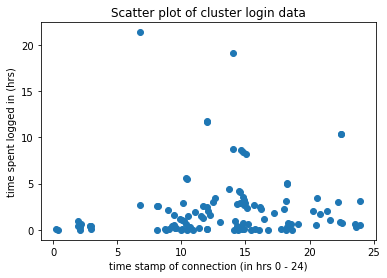

In [4]:
plt.scatter(connect_data, session_data)
plt.title('Scatter plot of cluster login data')
plt.xlabel('time stamp of connection (in hrs 0 - 24)')
plt.ylabel('time spent logged in (hrs)')
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
import sklearn


lm = LinearRegression()
lm

In [12]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
connect_data = connect_data.reshape(-1,1)

lm.fit(connect_data, session_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lm.predict(connect_data)[0:5]

array([ 1.3824036 ,  1.39230154,  1.49686314,  1.49954252,  1.51056841])

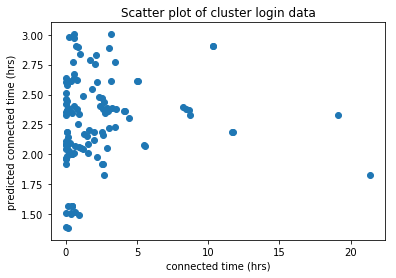

In [20]:
plt.scatter(session_data, lm.predict(connect_data))
plt.title('Scatter plot of cluster login data')
plt.xlabel('connected time (hrs)')
plt.ylabel('predicted connected time (hrs)')
plt.show()

In [24]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(connect_data, session_data, test_size=0.33, random_state =5)

/home/cloud/code/virtualenvs/probs_jupyter/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


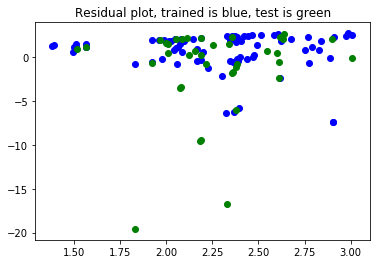

In [25]:
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, c='b')
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, c='g')
plt.title("Residual plot, trained is blue, test is green")
plt.show()

In [27]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - lm.predict(x_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - lm.predict(x_test)) ** 2))



Fit a model X_train, and calculate MSE with Y_train: 5.40391909314
Fit a model X_train, and calculate MSE with X_test, Y_test: 25.7363824629


In [28]:
print(lm.coef_, lm.intercept_)

[ 0.06852634] 1.36510069566


In [30]:
from sklearn.metrics import r2_score

print(r2_score(session_data, lm.predict(connect_data)))

0.0115887247151
